#### DATA SET INDICE DE CALIDAD DEL AIRE

In [43]:
import pandas as pd

# Carga el dataset
df = pd.read_csv('AirQualityUCI.csv')

# Muestra las primeras filas del dataset
print(df.head())


        Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  10/3/2004  18.00.00     2.6         1360     150.0      11.9   
1  10/3/2004  19.00.00     2.0         1292     112.0       9.4   
2  10/3/2004  20.00.00     2.2         1402      88.0       9.0   
3  10/3/2004  21.00.00     2.2         1376      80.0       9.2   
4  10/3/2004  22.00.00     1.6         1272      51.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0           1046      166          1056      113          1692       1268.0   
1            955      103          1174       92          1559        972.0   
2            939      131          1140      114          1555       1074.0   
3            948      172          1092      122          1584       1203.0   
4            836      131          1205      116          1490       1110.0   

      T    RH      AH  
0  13.6  48.9  0.7578  
1  13.3  47.7  0.7255  
2  11.9  54.0  0.7502  
3  11.0  60.0  0.7867  
4 

### 2: Análisis Exploratorio

                                Date         Time       CO(GT)  PT08.S1(CO)  \
count                           9357  9356.000000  9357.000000  9357.000000   
mean   2004-09-21 04:30:05.193972480    11.498824   -34.033536  1048.816074   
min              2004-03-10 00:00:00     0.000000  -200.000000  -200.000000   
25%              2004-06-16 00:00:00     5.000000     0.600000   921.000000   
50%              2004-09-21 00:00:00    11.000000     1.500000  1053.000000   
75%              2004-12-28 00:00:00    18.000000     2.600000  1221.000000   
max              2005-04-04 00:00:00    23.000000  1428.000000  2040.000000   
std                              NaN     6.923503    79.096080   330.062067   

          NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)      NOx(GT)  PT08.S3(NOx)  \
count  9357.000000  9357.000000    9357.000000  9357.000000   9357.000000   
mean   -159.066485     2.004628     894.432724   168.696484    794.910655   
min    -200.000000  -200.000000    -200.000000  -200.0000

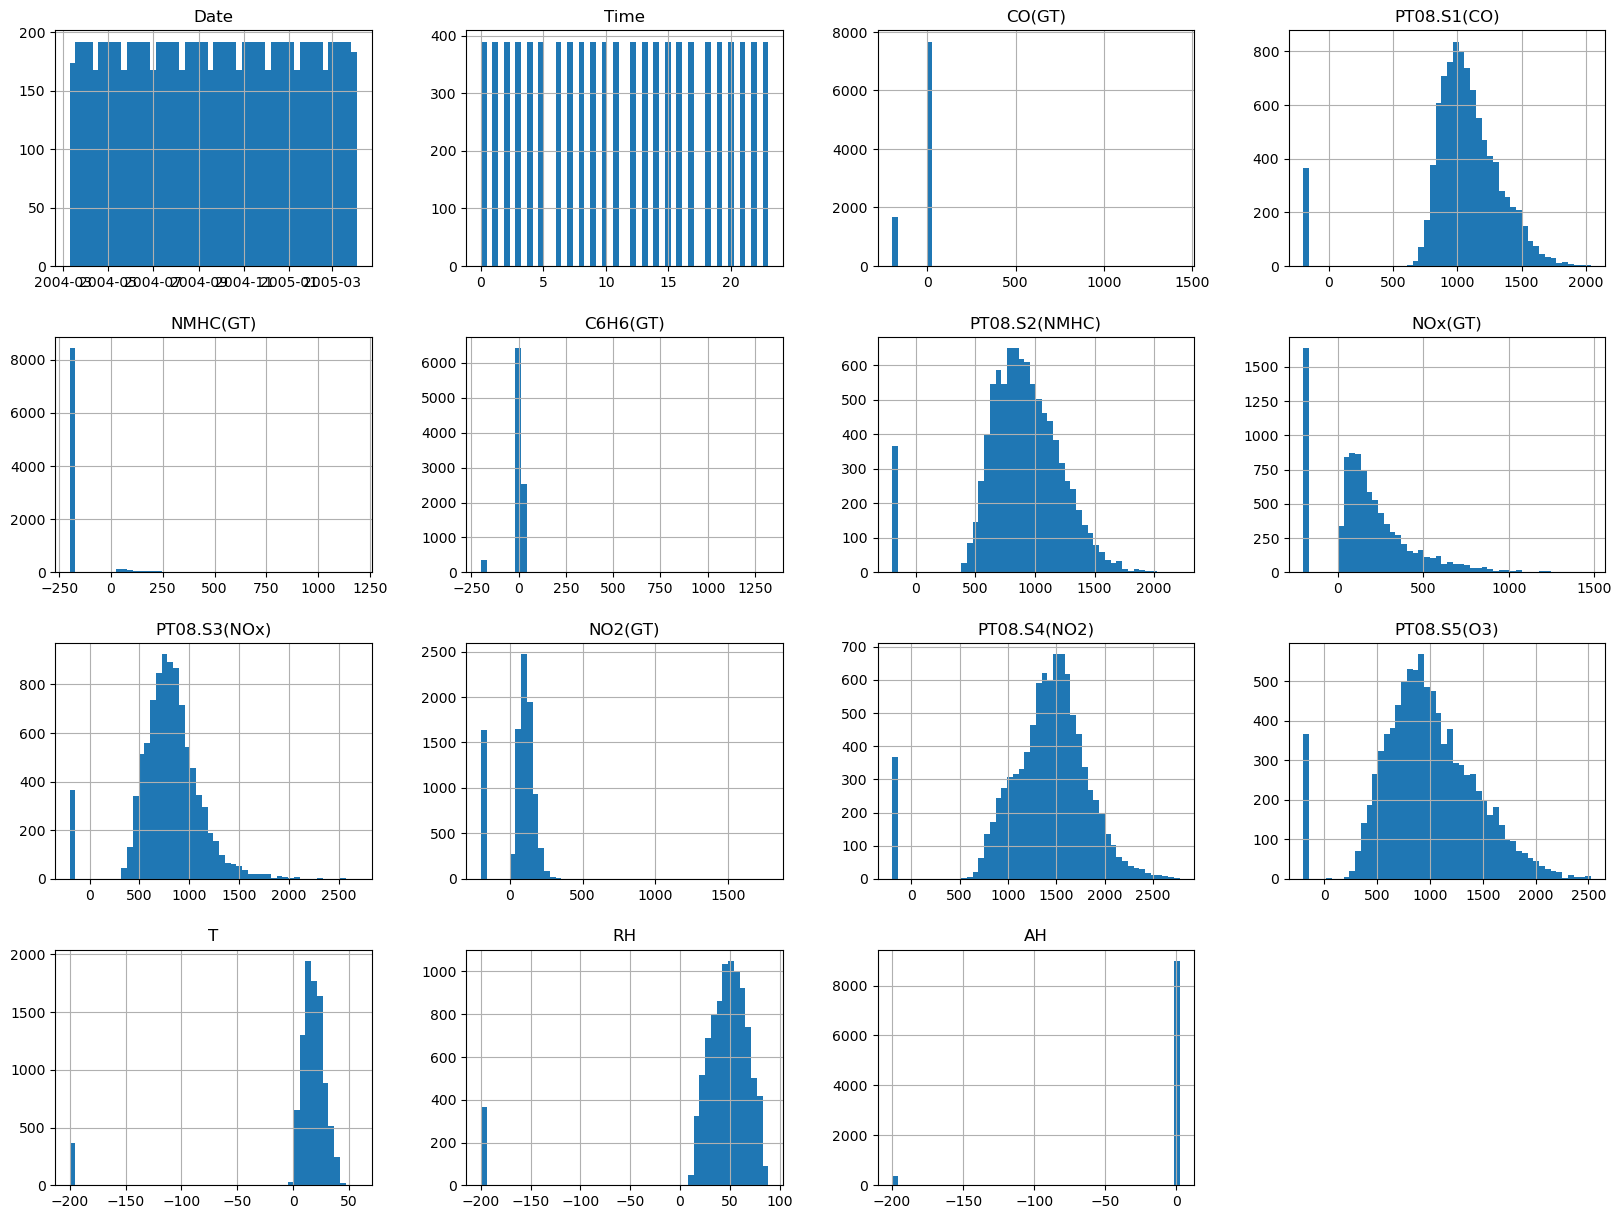

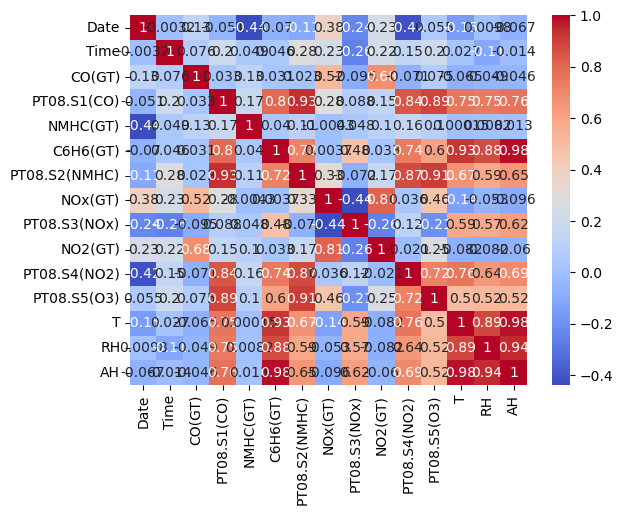

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

#Resumen estadístico
print(df.describe())

# Verifica si existen valores faltantes
print(df.isnull().sum())

#Visualiza distribuciones de variables numéricas
df.hist(bins=50, figsize=(20,15))
plt.show()

 #Correlacino entre variables
corre = df.corr()
sns.heatmap(corre, annot=True, cmap='coolwarm')
plt.show()


In [13]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')
df['Time'] = pd.to_datetime(df['Time'], format='%H.%M.%S', errors='coerce').dt.hour

In [14]:
print(df.head())

        Date  Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
0 2004-03-10  18.0     2.6         1360     150.0      11.9           1046   
1 2004-03-10  19.0     2.0         1292     112.0       9.4            955   
2 2004-03-10  20.0     2.2         1402      88.0       9.0            939   
3 2004-03-10  21.0     2.2         1376      80.0       9.2            948   
4 2004-03-10  22.0     1.6         1272      51.0       6.5            836   

   NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0      166          1056      113          1692       1268.0  13.6  48.9   
1      103          1174       92          1559        972.0  13.3  47.7   
2      131          1140      114          1555       1074.0  11.9  54.0   
3      172          1092      122          1584       1203.0  11.0  60.0   
4      131          1205      116          1490       1110.0  11.2  59.6   

       AH  
0  0.7578  
1  0.7255  
2  0.7502  
3  0.7867  
4  0.7888  


In [15]:
print(df.isnull().sum())

Date             0
Time             1
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               1
dtype: int64


### Ingenieria de Caracteristicas

In [18]:
## Imputación de datos que hagan falta

from sklearn.impute import SimpleImputer

# Seleccionar columnas numéricas
num_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Imputación de valores numéricos faltantes
num_imputer = SimpleImputer(strategy='mean')
df[num_columns] = num_imputer.fit_transform(df[num_columns])

# Verificar nuevamente valores faltantes
print(df.isnull().sum())



Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


In [23]:
## Conversion de variables categoricas

# Crear nuevas columnas para Year, Month, Day
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

df = pd.get_dummies(df, columns=['Year', 'Month', 'Day'])

print(df.head())




        Date  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0 2004-03-10     2.6       1360.0     150.0      11.9         1046.0    166.0   
1 2004-03-10     2.0       1292.0     112.0       9.4          955.0    103.0   
2 2004-03-10     2.2       1402.0      88.0       9.0          939.0    131.0   
3 2004-03-10     2.2       1376.0      80.0       9.2          948.0    172.0   
4 2004-03-10     1.6       1272.0      51.0       6.5          836.0    131.0   

   PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  ...  Day_22  Day_23  Day_24  Day_25  \
0        1056.0    113.0        1692.0  ...   False   False   False   False   
1        1174.0     92.0        1559.0  ...   False   False   False   False   
2        1140.0    114.0        1555.0  ...   False   False   False   False   
3        1092.0    122.0        1584.0  ...   False   False   False   False   
4        1205.0    116.0        1490.0  ...   False   False   False   False   

   Day_26  Day_27  Day_28  Day_29  Day

In [25]:
## Conversion de variables numericas
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Seleccionar columnas numéricas nuevamente
num_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[num_columns] = scaler.fit_transform(df[num_columns])



In [27]:
## Outliers

Q1 = df[num_columns].quantile(0.25)
Q3 = df[num_columns].quantile(0.75)
IQR = Q3 - Q1

# Filtra outliers
df = df[((df[num_columns] < (Q1 - 1.5 * IQR)) | (df[num_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [28]:
print(df.columns)


Index(['Date', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       ...
       'Day_22', 'Day_23', 'Day_24', 'Day_25', 'Day_26', 'Day_27', 'Day_28',
       'Day_29', 'Day_30', 'Day_31'],
      dtype='object', length=174)


In [45]:
import numpy as np

# Funciones para calcular AQI
def calculate_aqi(pm25):
    breakpoints = [0, 12.1, 35.5, 55.5, 150.5, 250.5, 350.5, 500.5]
    aqi_values = [0, 50, 100, 150, 200, 300, 400, 500]
    
    if pm25 <= breakpoints[1]:
        return ((aqi_values[1] - aqi_values[0]) / (breakpoints[1] - breakpoints[0])) * (pm25 - breakpoints[0]) + aqi_values[0]
    elif pm25 <= breakpoints[2]:
        return ((aqi_values[2] - aqi_values[1]) / (breakpoints[2] - breakpoints[1])) * (pm25 - breakpoints[1]) + aqi_values[1]
    elif pm25 <= breakpoints[3]:
        return ((aqi_values[3] - aqi_values[2]) / (breakpoints[3] - breakpoints[2])) * (pm25 - breakpoints[2]) + aqi_values[2]
    elif pm25 <= breakpoints[4]:
        return ((aqi_values[4] - aqi_values[3]) / (breakpoints[4] - breakpoints[3])) * (pm25 - breakpoints[3]) + aqi_values[3]
    elif pm25 <= breakpoints[5]:
        return ((aqi_values[5] - aqi_values[4]) / (breakpoints[5] - breakpoints[4])) * (pm25 - breakpoints[4]) + aqi_values[4]
    elif pm25 <= breakpoints[6]:
        return ((aqi_values[6] - aqi_values[5]) / (breakpoints[6] - breakpoints[5])) * (pm25 - breakpoints[5]) + aqi_values[5]
    else:
        return ((aqi_values[7] - aqi_values[6]) / (breakpoints[7] - breakpoints[6])) * (pm25 - breakpoints[6]) + aqi_values[6]

# AQI general
def calculate_overall_aqi(df):
    aqi_values = []
    for index, row in df.iterrows():
        aqi_pm25 = calculate_aqi(row['PT08.S1(CO)'])  
        aqi_values.append(aqi_pm25)        
        
    return np.max(aqi_values)

# DATASET
df = pd.read_csv('AirQualityUCI.csv')

#  AQI general
overall_aqi = calculate_overall_aqi(df)
print("AQI General:", overall_aqi)




AQI General: 1526.3333333333333


Mean Squared Error (MSE): 0.00046909882478632175
R^2 Score: 0.9999999206010104


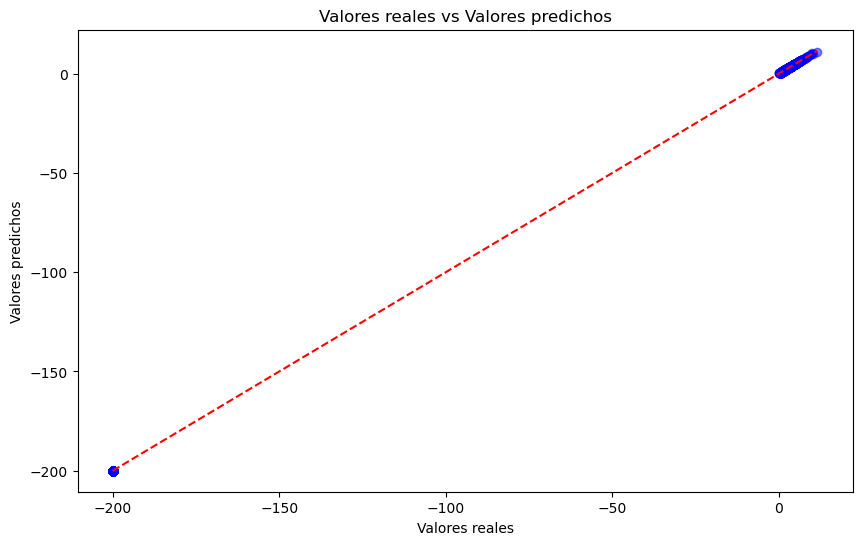

MemoryError: Unable to allocate 15.7 PiB for an array with shape (2202955452453712,) and data type float64

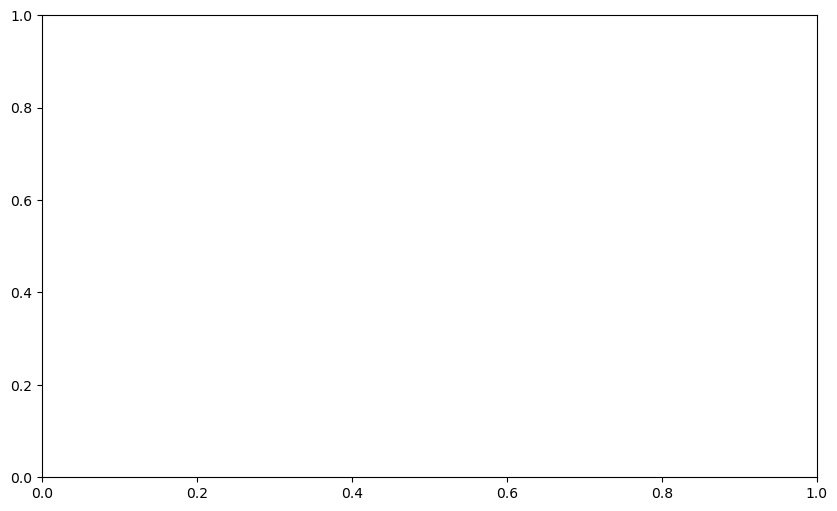

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

df = pd.read_csv('AirQualityUCI.csv')

# Variables predictorias (features)
features = [
    'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 
    'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 
    'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH'
]

X = df[features]
y = df['CO(GT)']

# Divide datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define el imputador para tratar los valores NaN
imputer = SimpleImputer(strategy='mean')

# Crear un pipeline que incluye imputación y modelo de regersión
pipeline = Pipeline([
    ('imputer', imputer),
    ('rf_regressor', RandomForestRegressor(random_state=42))
])

# Entrena el modelo dentro del pipeline
pipeline.fit(X_train, y_train)

# Prediceen el conjunto
y_pred = pipeline.predict(X_test)

# Calcula residuos
residuos = y_test - y_pred

# Evalua el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R^2 Score:", r2)

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([np.min(y_test), np.max(y_test)], [np.min(y_test), np.max(y_test)], color='red', linestyle='--')
plt.title('Valores reales vs Valores predichos')
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.show()

# Plot de residuos
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True, color='blue')
plt.title('Distribución de Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()
